In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv(r"C:\Users\shubham\Downloads\loan_train.csv")

In [3]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
df.shape

(614, 13)

In [5]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [6]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [7]:
df['Credit_History'].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [8]:
#handling the missing values with most frequent categories for categorical data

In [9]:
def impute_nan(df,variable):
    most_frequent_category=df[variable].mode()[0]
    df[variable].fillna(most_frequent_category,inplace=True)

In [10]:
for feature in ['Gender','Married','Dependents','Self_Employed','Credit_History','LoanAmount','Loan_Amount_Term']:
    impute_nan(df,feature)

In [11]:
#handling missing value for numerical value using knn imputer

In [12]:
X=df.iloc[:,7:10]
X

,CoapplicantIncome,LoanAmount,Loan_Amount_Term
0,0.0,120.0,360.0
1,1508.0,128.0,360.0
2,0.0,66.0,360.0
3,2358.0,120.0,360.0
4,0.0,141.0,360.0
...,...,...,...
609,0.0,71.0,360.0
610,0.0,40.0,180.0
611,240.0,253.0,360.0
612,0.0,187.0,360.0


In [13]:
from sklearn.impute import KNNImputer

In [14]:
imputer=KNNImputer(n_neighbors=2)

In [15]:
WE=imputer.fit_transform(X)

In [16]:
df_new=pd.DataFrame(WE)

In [17]:
df_new

,0,1,2
0,0.0,120.0,360.0
1,1508.0,128.0,360.0
2,0.0,66.0,360.0
3,2358.0,120.0,360.0
4,0.0,141.0,360.0
...,...,...,...
609,0.0,71.0,360.0
610,0.0,40.0,180.0
611,240.0,253.0,360.0
612,0.0,187.0,360.0


In [18]:
df_new.columns =['CoapplicantIncome_new', 'LoanAmount_new', 'Loan_Amount_Term_new'] 

In [19]:
df_new

,CoapplicantIncome_new,LoanAmount_new,Loan_Amount_Term_new
0,0.0,120.0,360.0
1,1508.0,128.0,360.0
2,0.0,66.0,360.0
3,2358.0,120.0,360.0
4,0.0,141.0,360.0
...,...,...,...
609,0.0,71.0,360.0
610,0.0,40.0,180.0
611,240.0,253.0,360.0
612,0.0,187.0,360.0


In [20]:
df['Loan_Status'].unique()

array(['Y', 'N'], dtype=object)

In [21]:
final_data=pd.concat([df,df_new],axis=1)
final_data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,CoapplicantIncome_new,LoanAmount_new,Loan_Amount_Term_new
0,LP001002,Male,No,0,Graduate,No,5849,0.0,120.0,360.0,1.0,Urban,Y,0.0,120.0,360.0
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,1508.0,128.0,360.0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,0.0,66.0,360.0
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,2358.0,120.0,360.0
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,0.0,141.0,360.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y,0.0,71.0,360.0
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y,0.0,40.0,180.0
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y,240.0,253.0,360.0
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y,0.0,187.0,360.0


In [22]:
final_data.isnull().sum()

Loan_ID                  0
Gender                   0
Married                  0
Dependents               0
Education                0
Self_Employed            0
ApplicantIncome          0
CoapplicantIncome        0
LoanAmount               0
Loan_Amount_Term         0
Credit_History           0
Property_Area            0
Loan_Status              0
CoapplicantIncome_new    0
LoanAmount_new           0
Loan_Amount_Term_new     0
dtype: int64

In [23]:
final_data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,CoapplicantIncome_new,LoanAmount_new,Loan_Amount_Term_new
0,LP001002,Male,No,0,Graduate,No,5849,0.0,120.0,360.0,1.0,Urban,Y,0.0,120.0,360.0
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,1508.0,128.0,360.0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,0.0,66.0,360.0
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,2358.0,120.0,360.0
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,0.0,141.0,360.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y,0.0,71.0,360.0
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y,0.0,40.0,180.0
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y,240.0,253.0,360.0
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y,0.0,187.0,360.0


In [24]:
final_data['Loan_Amount_Term'].unique()

array([360., 120., 240., 180.,  60., 300., 480.,  36.,  84.,  12.])

In [25]:
#categorical variable converted into  dummy varibale

In [26]:
final_data.Gender=final_data.Gender.map({'Male':1,'Female':0})
final_data.Married=final_data.Married.map({'Yes':1,'No':0})
final_data.Dependents=final_data.Dependents.map({'0':0,'1':1,'2':2,'3+':3})
final_data.Education=final_data.Education.map({'Graduate':1,'Not Graduate':0})
final_data.Self_Employed=final_data.Self_Employed.map({'Yes':1,'No':0})
final_data.Property_Area=final_data.Property_Area.map({'Urban':2,'Rural':0,'Semiurban':1})
final_data.Loan_Status=final_data.Loan_Status.map({'Y':1,'N':0})

In [27]:
final_data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,CoapplicantIncome_new,LoanAmount_new,Loan_Amount_Term_new
0,LP001002,1,0,0,1,0,5849,0.0,120.0,360.0,1.0,2,1,0.0,120.0,360.0
1,LP001003,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0,1508.0,128.0,360.0
2,LP001005,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,2,1,0.0,66.0,360.0
3,LP001006,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,2,1,2358.0,120.0,360.0
4,LP001008,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,2,1,0.0,141.0,360.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,0,0,0,1,0,2900,0.0,71.0,360.0,1.0,0,1,0.0,71.0,360.0
610,LP002979,1,1,3,1,0,4106,0.0,40.0,180.0,1.0,0,1,0.0,40.0,180.0
611,LP002983,1,1,1,1,0,8072,240.0,253.0,360.0,1.0,2,1,240.0,253.0,360.0
612,LP002984,1,1,2,1,0,7583,0.0,187.0,360.0,1.0,2,1,0.0,187.0,360.0


In [28]:
final_data.isnull().sum()

Loan_ID                  0
Gender                   0
Married                  0
Dependents               0
Education                0
Self_Employed            0
ApplicantIncome          0
CoapplicantIncome        0
LoanAmount               0
Loan_Amount_Term         0
Credit_History           0
Property_Area            0
Loan_Status              0
CoapplicantIncome_new    0
LoanAmount_new           0
Loan_Amount_Term_new     0
dtype: int64

In [29]:
final_data.drop(['CoapplicantIncome'],axis=1,inplace=True)
final_data.drop(['LoanAmount'],axis=1,inplace=True)
final_data.drop(['Loan_Amount_Term'],axis=1,inplace=True)

In [30]:
final_data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,Credit_History,Property_Area,Loan_Status,CoapplicantIncome_new,LoanAmount_new,Loan_Amount_Term_new
0,LP001002,1,0,0,1,0,5849,1.0,2,1,0.0,120.0,360.0
1,LP001003,1,1,1,1,0,4583,1.0,0,0,1508.0,128.0,360.0
2,LP001005,1,1,0,1,1,3000,1.0,2,1,0.0,66.0,360.0
3,LP001006,1,1,0,0,0,2583,1.0,2,1,2358.0,120.0,360.0
4,LP001008,1,0,0,1,0,6000,1.0,2,1,0.0,141.0,360.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,0,0,0,1,0,2900,1.0,0,1,0.0,71.0,360.0
610,LP002979,1,1,3,1,0,4106,1.0,0,1,0.0,40.0,180.0
611,LP002983,1,1,1,1,0,8072,1.0,2,1,240.0,253.0,360.0
612,LP002984,1,1,2,1,0,7583,1.0,2,1,0.0,187.0,360.0


In [31]:
y  = final_data[['Loan_Status']]

In [32]:
x = pd.concat([final_data.iloc[:,1:9],final_data.iloc[:,-3:]],axis = 1)

In [33]:
X = final_data.iloc[:,1:9]

In [34]:
x.shape

(614, 11)

In [35]:
### Feature Importance
from sklearn.ensemble import ExtraTreesRegressor
import matplotlib.pyplot as plt
model = ExtraTreesRegressor()
model.fit(x,y.values.ravel())

ExtraTreesRegressor()

In [36]:
print(model.feature_importances_)

[0.02521345 0.01418337 0.06159006 0.0276796  0.02197171 0.17550419
 0.29220087 0.04044504 0.12357816 0.16829301 0.04934055]


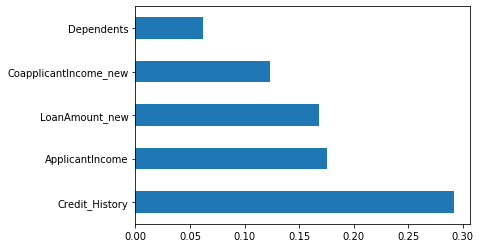

In [37]:
#top five features
import seaborn as sns
feat_importances = pd.Series(model.feature_importances_, index=x.columns)
feat_importances.nlargest(5).plot(kind='barh')
plt.show()

In [38]:
#model creation
from sklearn.model_selection import train_test_split

In [41]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
x_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
logreg = LogisticRegression()
logreg.fit(x_train, y_train.values.ravel())

C:\Users\shubham\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [42]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.84


In [43]:
score = logreg.score(X_test, y_test)
print(score)

0.8373983739837398


In [44]:
#we user another model random forest classifier

In [45]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train.values.ravel())

y_pred=clf.predict(X_test)

In [46]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7723577235772358
